# PROJECT PROGRESS V.
Karen Coppage

Cleaned up code so there wasn’t so much clutter/repetition

Found and integrated the CIA World Factbook population statistics, in order to calculate percentages for columns where only numbers of people are given

Integrated data from “gender_development.csv” into “gender_inequality.csv”

Calculated one-column ratios where statistics for males and females were given in separate columns

Corrected my KNN charts, which were initially very wrong 

Added the leave-one-out technique to find out which attributes were most and least important.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font="Droid Sans",font_scale = 1.5)
sns.set_style("whitegrid")
sns.set_color_codes("dark")
import numpy as np

In [2]:
import pandas as pd
gender_data = pd.read_csv("../karencoppage/Desktop/DataMining/HumanDevData/gender_inequality.csv",sep=",")
gender_development_data = pd.read_csv("../karencoppage/Desktop/DataMining/HumanDevData/gender_development.csv",sep=",")
poverty_data = pd.read_csv("../karencoppage/Desktop/DataMining/HumanDevData/multidimensional_poverty.csv",sep=",")
population_data = pd.read_csv("../karencoppage/Desktop/DataMining/country_population.csv",sep=",")


gender_data = gender_data.merge(gender_development_data, on="Country", sort="true")
gender_data = gender_data.dropna()
gender_data = gender_data.drop("Human Development Index (Female)", 1)
gender_data = gender_data.drop("Human Development Index (Male)", 1)

gender_data.sort_values("Country")[0:5]

,GII Rank,Country,Gender Inequality Index (GII),Maternal Mortality Ratio,Adolescent Birth Rate,Percent Representation in Parliament,Population with Secondary Education (Female),Population with Secondary Education (Male),Labour Force Participation Rate (Female),Labour Force Participation Rate (Male),GDI Rank,Gender Development Index (GDI),Life Expectancy at Birth (Female),Life Expectancy at Birth (Male),Expected Years of Education (Female),Expected Years of Education (Male),Mean Years of Education (Female),Mean Years of Education (Male),Estimated Gross National Income per Capita (Female),Estimated Gross National Income per Capita (Male)
0,171.0,Afghanistan,0.69,400.0,86.8,27.6,5.9,29.8,15.8,79.5,171.0,0.600,61.6,59.2,7.2,11.3,1.2,5.1,506.0,3227.0
1,85.0,Albania,0.22,21.0,15.3,20.7,81.8,87.9,44.9,65.5,85.0,0.948,80.4,75.4,11.9,11.8,8.9,9.6,7217.0,12655.0
2,83.0,Algeria,0.41,89.0,10.0,25.7,26.7,31.0,15.2,72.2,83.0,0.837,77.2,72.5,14.2,13.8,4.8,7.8,3898.0,22009.0
7,40.0,Argentina,0.38,69.0,54.4,36.8,56.3,57.6,47.5,75.0,40.0,0.982,80.1,72.4,19.1,16.8,9.8,9.8,14202.0,30237.0
8,85.0,Armenia,0.32,29.0,27.1,10.7,94.0,95.0,54.2,72.6,85.0,1.008,78.6,70.9,13.6,11.2,10.8,10.9,6042.0,10089.0


In [3]:
population_data.sort_values("Country")[0:5]

,Pos,Country,Population
40,41,Afghanistan,32564342.0
136,137,Albania,3029278.0
33,34,Algeria,39542166.0
207,208,American Samoa,54343.0
200,201,Andorra,85580.0


In [4]:
poverty_data = poverty_data.dropna()
poverty_data.sort_values("Country")[0:5]

,Country,Year and Survey,"Multidimensional Poverty Index (MPI, HDRO)",MPI HDRO Percent,"Multidimensional Poverty Index (MPI, 2010)",MPI 2010 Percent,Population in Multidimensional Poverty,Intensity of Deprivation,Education Deprivation,Health Deprivation,Living Standards,Population Below National Poverty Line,Population Below $1.25 per Day
1,Albania,2008/2009 D,0.01,1.2,0.01,1.4,38.0,38.3,22.4,47.1,30.5,14.3,0.5
3,Armenia,2010 D,0.00,0.6,0.00,0.3,18.0,37.0,3.4,87.8,8.7,32.0,1.8
4,Azerbaijan,2006 D,0.01,2.4,0.02,5.3,210.0,38.2,20.0,50.7,29.3,5.3,0.3
5,Bangladesh,2011 D,0.24,49.5,0.25,51.3,75610.0,47.8,28.4,26.6,44.9,31.5,43.3
7,Belarus,2005 M,0.00,0.4,0.00,0.0,41.0,34.5,2.6,89.7,7.7,5.5,0.0


# Let's see how gender inequality contributes to poverty!

In [5]:
# Create new ratio columns where 2 columns denote female and male rates. Ratio=female rate/male rate

gender_data['Population with Secondary Education Ratio']=gender_data['Population with Secondary Education (Female)']/gender_data['Population with Secondary Education (Male)']
gender_data['Labour Force Participation Ratio']=gender_data['Labour Force Participation Rate (Female)']/gender_data['Labour Force Participation Rate (Male)']
gender_data['Expected Years of Education Ratio']=gender_data['Expected Years of Education (Female)']/gender_data['Expected Years of Education (Male)']
gender_data['Mean Years of Education Ratio']=gender_data['Mean Years of Education (Female)']/gender_data['Mean Years of Education (Male)']
gender_data['Life Expectancy at Birth Ratio']=gender_data['Life Expectancy at Birth (Female)']/gender_data['Life Expectancy at Birth (Male)']


#this doesn't have Expected years of education!!
# gender_with_target_poverty_data['Population with Secondary Education Ratio']=gender_with_target_poverty_data['Population with Secondary Education (Female)']/gender_with_target_poverty_data['Population with Secondary Education (Male)']
# gender_with_target_poverty_data['Labour Force Participation Ratio']=gender_with_target_poverty_data['Labour Force Participation Rate (Female)']/gender_with_target_poverty_data['Labour Force Participation Rate (Male)']
# gender_with_target_poverty_data['Mean Years of Education Ratio']=gender_with_target_poverty_data['Mean Years of Education (Female)']/gender_with_target_poverty_data['Mean Years of Education (Male)']
# gender_with_target_poverty_data['Life Expectancy at Birth Ratio']=gender_with_target_poverty_data['Life Expectancy at Birth (Female)']/gender_with_target_poverty_data['Life Expectancy at Birth (Male)']

gender_data = gender_data.drop("Population with Secondary Education (Female)", 1)
gender_data = gender_data.drop("Population with Secondary Education (Male)", 1)
gender_data = gender_data.drop("Labour Force Participation Rate (Female)", 1)
gender_data = gender_data.drop("Labour Force Participation Rate (Male)", 1)
gender_data = gender_data.drop("Expected Years of Education (Female)", 1)
gender_data = gender_data.drop("Expected Years of Education (Male)", 1)
gender_data = gender_data.drop("Mean Years of Education (Female)", 1)
gender_data = gender_data.drop("Mean Years of Education (Male)", 1)
gender_data = gender_data.drop("Life Expectancy at Birth (Female)", 1)
gender_data = gender_data.drop("Life Expectancy at Birth (Male)", 1)


#this doesn't have Expected years of education!!
# gender_with_target_poverty_data['Population with Secondary Education Ratio']=gender_with_target_poverty_data['Population with Secondary Education (Female)']/gender_with_target_poverty_data['Population with Secondary Education (Male)']
# gender_with_target_poverty_data['Labour Force Participation Ratio']=gender_with_target_poverty_data['Labour Force Participation Rate (Female)']/gender_with_target_poverty_data['Labour Force Participation Rate (Male)']
# gender_with_target_poverty_data['Mean Years of Education Ratio']=gender_with_target_poverty_data['Mean Years of Education (Female)']/gender_with_target_poverty_data['Mean Years of Education (Male)']
# gender_with_target_poverty_data['Life Expectancy at Birth Ratio']=gender_with_target_poverty_data['Life Expectancy at Birth (Female)']/gender_with_target_poverty_data['Life Expectancy at Birth (Male)']

#this doesn't have Expected years of education!!
# gender_with_target_poverty_data = gender_with_target_poverty_data.drop("Population with Secondary Education (Female)", 1)
# gender_with_target_poverty_data = gender_with_target_poverty_data.drop("Population with Secondary Education (Male)", 1)
# gender_with_target_poverty_data = gender_with_target_poverty_data.drop("Labour Force Participation Rate (Female)", 1)
# gender_with_target_poverty_data = gender_with_target_poverty_data.drop("Labour Force Participation Rate (Male)", 1)
# gender_with_target_poverty_data = gender_with_target_poverty_data.drop("Mean Years of Education (Female)", 1)
# gender_with_target_poverty_data = gender_with_target_poverty_data.drop("Mean Years of Education (Male)", 1)
# gender_with_target_poverty_data = gender_with_target_poverty_data.drop("Life Expectancy at Birth (Female)", 1)
# gender_with_target_poverty_data = gender_with_target_poverty_data.drop("Life Expectancy at Birth (Male)", 1)

gender_with_target_poverty_data = gender_data.merge(poverty_data[["Country", "Multidimensional Poverty Index (MPI, HDRO)"]], on="Country", sort="true")

gender_with_target_poverty_data[0:5]


,GII Rank,Country,Gender Inequality Index (GII),Maternal Mortality Ratio,Adolescent Birth Rate,Percent Representation in Parliament,GDI Rank,Gender Development Index (GDI),Estimated Gross National Income per Capita (Female),Estimated Gross National Income per Capita (Male),Population with Secondary Education Ratio,Labour Force Participation Ratio,Expected Years of Education Ratio,Mean Years of Education Ratio,Life Expectancy at Birth Ratio,"Multidimensional Poverty Index (MPI, HDRO)"
0,85.0,Albania,0.22,21.0,15.3,20.7,85.0,0.948,7217.0,12655.0,0.930603,0.685496,1.008475,0.927083,1.066313,0.01
1,85.0,Armenia,0.32,29.0,27.1,10.7,85.0,1.008,6042.0,10089.0,0.989474,0.746556,1.214286,0.990826,1.108604,0.00
2,78.0,Azerbaijan,0.30,26.0,40.0,15.6,78.0,0.942,10120.0,22814.0,0.962012,0.903736,0.983333,0.937500,1.093058,0.01
3,142.0,Bangladesh,0.50,170.0,80.6,20.0,142.0,0.917,2278.0,4083.0,0.825666,0.682521,1.061856,0.818182,1.035511,0.24
4,50.0,Belarus,0.15,1.0,20.6,30.1,50.0,1.021,12922.0,21010.0,0.943601,0.793978,1.072848,0.983471,1.178626,0.00


In [6]:
#secondary education ratio: Population with Secondary Education (Female)/Population with Secondary Education (Male)?
feature_columns = ["Maternal Mortality Ratio", 
                   "Adolescent Birth Rate",
                   "Percent Representation in Parliament",
                   "Population with Secondary Education Ratio",
                   "Labour Force Participation Ratio",
                   "Expected Years of Education Ratio",
                  "Mean Years of Education Ratio",
                  "Life Expectancy at Birth Ratio"]
features_pandas = gender_with_target_poverty_data[feature_columns]
features = features_pandas.as_matrix()
target_pandas = gender_with_target_poverty_data["Multidimensional Poverty Index (MPI, HDRO)"]
target = target_pandas.as_matrix()

In [7]:
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.33, random_state=42)

In [8]:
# from sklearn import linear_model
# from sklearn.metrics import mean_squared_error
# import numpy as np
# model= linear_model.LinearRegression()
# model.fit(features_train,target_train)
# predictions= model.predict(features_test)
# print(np.sqrt(mean_squared_error(target_test,predictions)))

In [9]:
from sklearn import linear_model, tree
from sklearn.metrics import mean_squared_error
import numpy as np

def showRegression(model, regressionType, features_train, target_train, features_test, target_test):
    model.fit(features_train,target_train)
    predictions= model.predict(features_test)
    print(regressionType)
    mseScores[regressionType]= np.sqrt(mean_squared_error(target_test,predictions))
    print("MSE: ", np.sqrt(mean_squared_error(target_test,predictions)))

    plt.figure(figsize=(8,6))
    plt.plot([-0.1,0.6],[-0.2,0.6],"-",linewidth=2,c="r")
    plt.plot(target_test,predictions,"o",markersize=5,alpha=0.2,c="b")
    plt.xlabel("poverty rating")
    plt.ylabel("predicted rating")

mseScores = {}

Linear Regression
MSE:  0.0606007532282


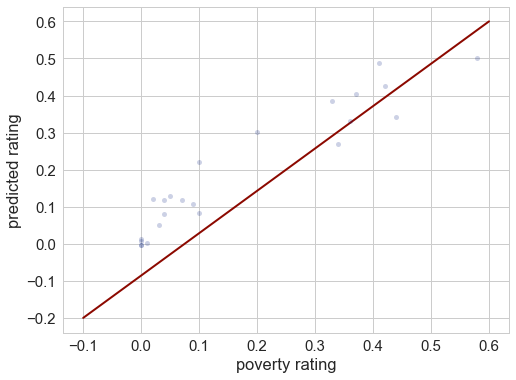

In [10]:
model= linear_model.LinearRegression()
showRegression(model, "Linear Regression", features_train,target_train, features_test, target_test)

Ridge Regression, alpha=0.5
MSE:  0.0631539447424


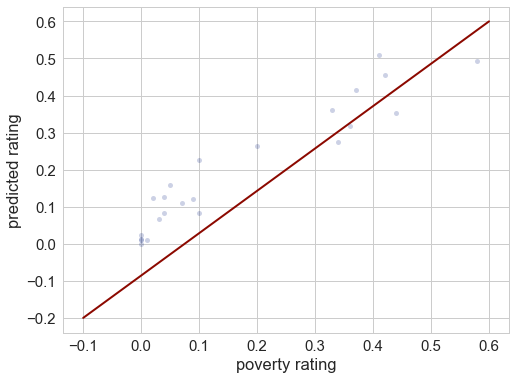

In [11]:
model= linear_model.Ridge(alpha=0.5)
showRegression(model, "Ridge Regression, alpha=0.5", features_train,target_train, features_test, target_test)

Ridge Regression, alpha=0.001
MSE:  0.0606028049244


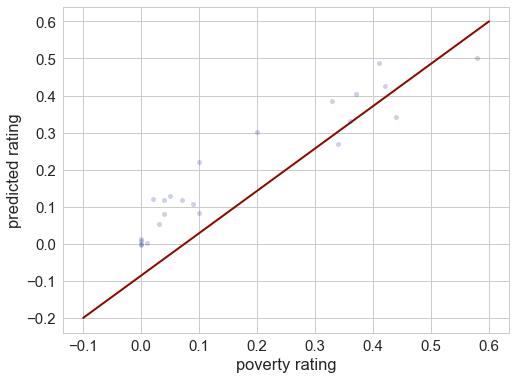

In [12]:
model= linear_model.Ridge(alpha=0.001) 
showRegression(model, "Ridge Regression, alpha=0.001", features_train,target_train, features_test, target_test)

Lasso, alpha=1.0
MSE:  0.0882852142268


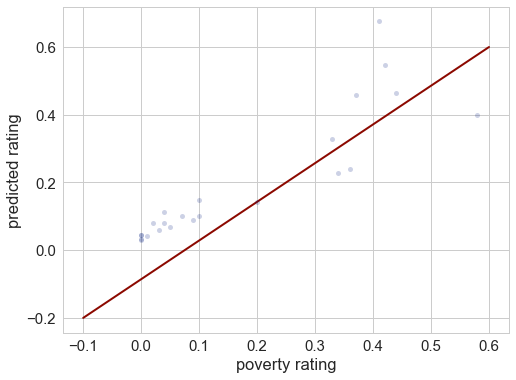

In [13]:
model= linear_model.Lasso() 
showRegression(model, "Lasso, alpha=1.0", features_train,target_train, features_test, target_test)

Lasso alpha=0.7
MSE:  0.0888577246446


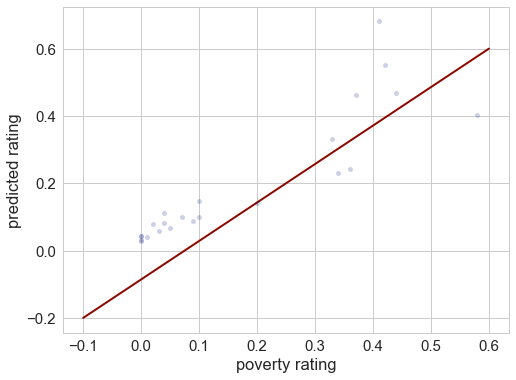

In [14]:
model= linear_model.Lasso(alpha=0.7) 
showRegression(model, "Lasso alpha=0.7", features_train,target_train, features_test, target_test)

SGD obviously does not work at all.

SGDRegressor alpha=0.001
MSE:  4.37367251643e+14


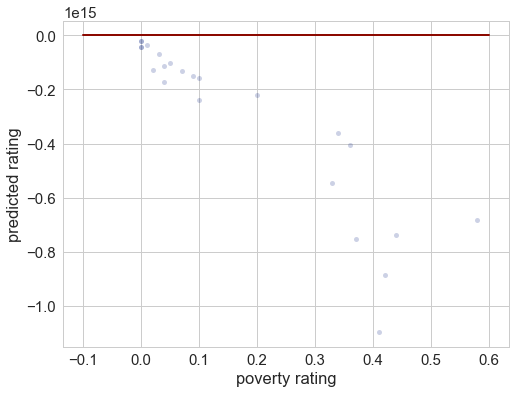

In [15]:
model= linear_model.SGDRegressor(alpha=0.001) 
showRegression(model, "SGDRegressor alpha=0.001", features_train,target_train, features_test, target_test)

DecisionTreeRegressor
MSE:  0.0935530540017


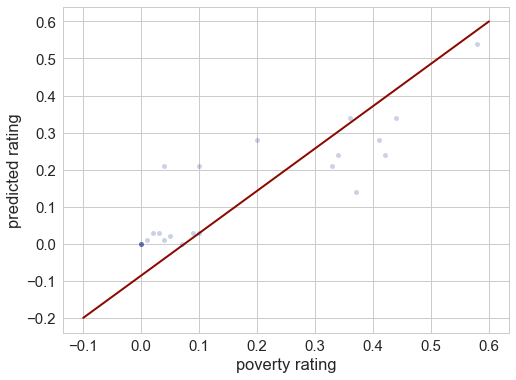

In [16]:
import sklearn
model = sklearn.tree.DecisionTreeRegressor()
showRegression(model, "DecisionTreeRegressor", features_train,target_train, features_test, target_test)

DecisionTreeRegressor, max_depth=9
MSE:  0.0915803282465


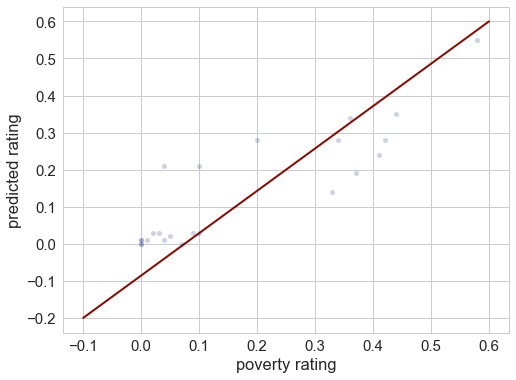

In [17]:
model = sklearn.tree.DecisionTreeRegressor(max_depth=9)
showRegression(model, "DecisionTreeRegressor, max_depth=9", features_train,target_train, features_test, target_test)

KNeighborsRegressor, K=3
MSE:  0.0687641070287


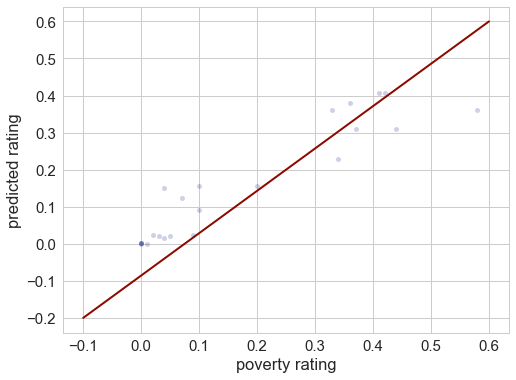

In [18]:
model= sklearn.neighbors.KNeighborsRegressor(n_neighbors = 3)
showRegression(model, "KNeighborsRegressor, K=3", features_train,target_train, features_test, target_test)

KNeighborsRegressor, K=8
MSE:  0.0700990861958


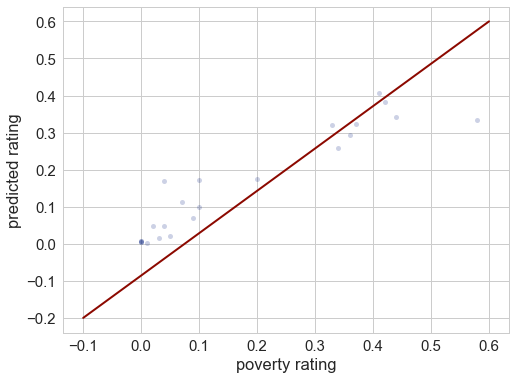

In [19]:
model= sklearn.neighbors.KNeighborsRegressor(n_neighbors = 8, weights='distance')
showRegression(model, "KNeighborsRegressor, K=8", features_train,target_train, features_test, target_test)


KNeighborsRegressor, K=30
MSE:  0.114736097113


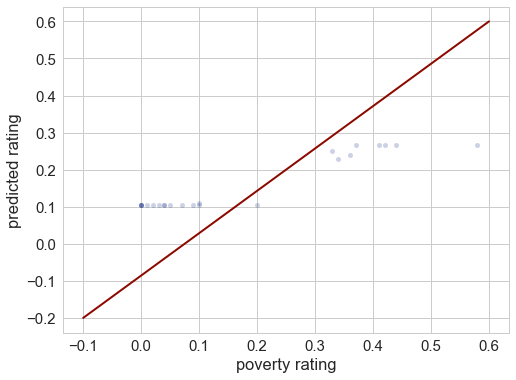

In [20]:
model= sklearn.neighbors.KNeighborsRegressor(n_neighbors = 30)
showRegression(model, "KNeighborsRegressor, K=30", features_train,target_train, features_test, target_test)


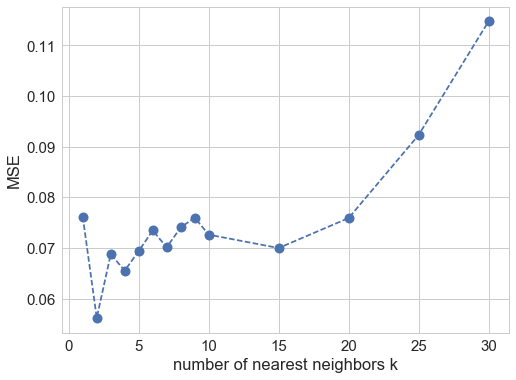

In [21]:
def makeKNNChart(features_train, target_train, features_test, target_test):
    K_values = [1,2,3,4,5,6,7,8,9,10,15,20,25,30]
    mse_values = []
    for k in K_values:
        model= sklearn.neighbors.KNeighborsRegressor(n_neighbors = k)
        model.fit(features_train,target_train)
        predictions= model.predict(features_test)
        mse_values.append(np.sqrt(mean_squared_error(target_test,predictions)))
    from sklearn import metrics
    plt.figure(figsize=(8,6))
    plt.plot(K_values,mse_values,"o--",markersize=10)

    plt.grid(which="minor")
    plt.xlabel("number of nearest neighbors k")
    plt.ylabel("MSE")


# K_values = [1,2,3,4,5,6,7,8,9,10,15,20,25,30]
# mse_values = []
# for k in K_values:
#     model= sklearn.neighbors.KNeighborsRegressor(n_neighbors = k)
#     model.fit(features_train,target_train)
#     predictions= model.predict(features_test)
#     mse_values.append(np.sqrt(mean_squared_error(target_test,predictions)))
# from sklearn import metrics
# plt.figure(figsize=(8,6))
# plt.plot(K_values,mse_values,"o--",markersize=10)

# plt.grid(which="minor")
# plt.xlabel("number of nearest neighbors k")
# plt.ylabel("MSE")

makeKNNChart(features_train, target_train, features_test, target_test)

In [22]:
for key in mseScores:
    print(mseScores[key], " ", key)

print("\nLowest MSE:")
min(mseScores.items(), key=lambda k: k[1])

0.0606007532282   Linear Regression
0.0631539447424   Ridge Regression, alpha=0.5
0.0606028049244   Ridge Regression, alpha=0.001
0.0882852142268   Lasso, alpha=1.0
0.0888577246446   Lasso alpha=0.7
4.37367251643e+14   SGDRegressor alpha=0.001
0.0935530540017   DecisionTreeRegressor
0.0915803282465   DecisionTreeRegressor, max_depth=9
0.0687641070287   KNeighborsRegressor, K=3
0.0700990861958   KNeighborsRegressor, K=8
0.114736097113   KNeighborsRegressor, K=30

Lowest MSE:


('Linear Regression', 0.060600753228165424)

In [23]:
mSEs = {}
def leaveOneOutLinearRegression(feature_columns, features, labels):
    for i in feature_columns:
        features_copy = features
        
        
        features_copy = features_copy.drop(i, 1)
        print (features_copy.columns)
        print("left out: ", i)
        features_temp = features_copy.as_matrix()
        features_train, features_test, labels_train, labels_test = train_test_split(features_temp, labels, test_size=0.33, random_state=42)
        
        model= linear_model.LinearRegression()
        model.fit(features_train,labels_train)
        predictions= model.predict(features_test)
        print("MSE: ", np.sqrt(mean_squared_error(target_test,predictions)))
        mSEs[i]=np.sqrt(mean_squared_error(target_test,predictions))

In [24]:
leaveOneOutLinearRegression(feature_columns, features_pandas, target_pandas)

Index(['Adolescent Birth Rate', 'Percent Representation in Parliament',
       'Population with Secondary Education Ratio',
       'Labour Force Participation Ratio', 'Expected Years of Education Ratio',
       'Mean Years of Education Ratio', 'Life Expectancy at Birth Ratio'],
      dtype='object')
left out:  Maternal Mortality Ratio
MSE:  0.0903994594886
Index(['Maternal Mortality Ratio', 'Percent Representation in Parliament',
       'Population with Secondary Education Ratio',
       'Labour Force Participation Ratio', 'Expected Years of Education Ratio',
       'Mean Years of Education Ratio', 'Life Expectancy at Birth Ratio'],
      dtype='object')
left out:  Adolescent Birth Rate
MSE:  0.0699536307037
Index(['Maternal Mortality Ratio', 'Adolescent Birth Rate',
       'Population with Secondary Education Ratio',
       'Labour Force Participation Ratio', 'Expected Years of Education Ratio',
       'Mean Years of Education Ratio', 'Life Expectancy at Birth Ratio'],
      dtype='ob

In [25]:
mSEs

{'Adolescent Birth Rate': 0.069953630703735309,
 'Expected Years of Education Ratio': 0.064488226176748792,
 'Labour Force Participation Ratio': 0.06161245775442168,
 'Life Expectancy at Birth Ratio': 0.060511741201460433,
 'Maternal Mortality Ratio': 0.090399459488575806,
 'Mean Years of Education Ratio': 0.062364468429047026,
 'Percent Representation in Parliament': 0.058599737213515808,
 'Population with Secondary Education Ratio': 0.062033026044199815}

In [26]:
print(min(mSEs.items(), key=lambda k: k[1]), "matters the least, \nand ", max(mSEs.items(), key=lambda k: k[1]), "matters the most.")

('Percent Representation in Parliament', 0.058599737213515808) matters the least, 
and  ('Maternal Mortality Ratio', 0.090399459488575806) matters the most.


# Let's see how poverty affects gender inequality!

In [27]:
poverty_data.sort_values("Country")

,Country,Year and Survey,"Multidimensional Poverty Index (MPI, HDRO)",MPI HDRO Percent,"Multidimensional Poverty Index (MPI, 2010)",MPI 2010 Percent,Population in Multidimensional Poverty,Intensity of Deprivation,Education Deprivation,Health Deprivation,Living Standards,Population Below National Poverty Line,Population Below $1.25 per Day
1,Albania,2008/2009 D,0.01,1.2,0.01,1.4,38.0,38.3,22.4,47.1,30.5,14.3,0.5
3,Armenia,2010 D,0.00,0.6,0.00,0.3,18.0,37.0,3.4,87.8,8.7,32.0,1.8
4,Azerbaijan,2006 D,0.01,2.4,0.02,5.3,210.0,38.2,20.0,50.7,29.3,5.3,0.3
5,Bangladesh,2011 D,0.24,49.5,0.25,51.3,75610.0,47.8,28.4,26.6,44.9,31.5,43.3
7,Belarus,2005 M,0.00,0.4,0.00,0.0,41.0,34.5,2.6,89.7,7.7,5.5,0.0
9,Benin,2011/2012 D,0.34,64.2,0.31,62.2,6455.0,53.3,33.1,24.8,42.1,36.2,51.6
10,Bhutan,2010 M,0.13,29.4,0.12,27.2,211.0,43.5,40.3,26.3,33.4,12.0,2.4
11,Bolivia (Plurinational State of),2008 D,0.10,20.6,0.09,20.5,2022.0,47.0,21.9,27.9,50.2,45.0,8.0
12,Bosnia and Herzegovina,2011/2012 M,0.01,1.7,0.00,0.5,65.0,37.3,7.8,79.5,12.7,17.9,0.0
14,Burkina Faso,2010 D,0.51,82.8,0.54,84.0,12875.0,61.3,39.0,22.5,38.5,46.7,44.5


In [28]:
# Create new ratio columns where 2 columns denote female and male rates. Ratio=female rate/male rate
poverty_with_target_gender_data = poverty_data.merge(gender_data[["Country", "Gender Inequality Index (GII)"]], on="Country", sort="true")


poverty_with_target_gender_data = poverty_with_target_gender_data.merge(population_data[["Country", "Population"]], on="Country", sort="true")

# type(poverty_with_target_gender_data['Population in Multidimensional Poverty'])
# type(poverty_with_target_gender_data['Population'])

poverty_with_target_gender_data['Percent in Multidimentional Poverty']=poverty_with_target_gender_data['Population in Multidimensional Poverty']*1000/poverty_with_target_gender_data['Population']
poverty_with_target_gender_data['Percent Below National Poverty Line']=poverty_with_target_gender_data['Population Below National Poverty Line']*1000/poverty_with_target_gender_data['Population']
poverty_with_target_gender_data['Percent Below $1.25 per Day']=poverty_with_target_gender_data['Population Below $1.25 per Day']*1000/poverty_with_target_gender_data['Population']



poverty_with_target_gender_data

,Country,Year and Survey,"Multidimensional Poverty Index (MPI, HDRO)",MPI HDRO Percent,"Multidimensional Poverty Index (MPI, 2010)",MPI 2010 Percent,Population in Multidimensional Poverty,Intensity of Deprivation,Education Deprivation,Health Deprivation,Living Standards,Population Below National Poverty Line,Population Below $1.25 per Day,Gender Inequality Index (GII),Population,Percent in Multidimentional Poverty,Percent Below National Poverty Line,Percent Below $1.25 per Day
0,Albania,2008/2009 D,0.01,1.2,0.01,1.4,38.0,38.3,22.4,47.1,30.5,14.3,0.50,0.22,3.029278e+06,0.012544,0.004721,0.000165
1,Armenia,2010 D,0.00,0.6,0.00,0.3,18.0,37.0,3.4,87.8,8.7,32.0,1.80,0.32,3.056382e+06,0.005889,0.010470,0.000589
2,Azerbaijan,2006 D,0.01,2.4,0.02,5.3,210.0,38.2,20.0,50.7,29.3,5.3,0.30,0.30,9.780780e+06,0.021471,0.000542,0.000031
3,Bangladesh,2011 D,0.24,49.5,0.25,51.3,75610.0,47.8,28.4,26.6,44.9,31.5,43.30,0.50,1.689577e+08,0.447508,0.000186,0.000256
4,Belarus,2005 M,0.00,0.4,0.00,0.0,41.0,34.5,2.6,89.7,7.7,5.5,0.00,0.15,9.589689e+06,0.004275,0.000574,0.000000
5,Benin,2011/2012 D,0.34,64.2,0.31,62.2,6455.0,53.3,33.1,24.8,42.1,36.2,51.60,0.61,1.044865e+07,0.617783,0.003465,0.004938
6,Bhutan,2010 M,0.13,29.4,0.12,27.2,211.0,43.5,40.3,26.3,33.4,12.0,2.40,0.46,7.419190e+05,0.284398,0.016174,0.003235
7,Burkina Faso,2010 D,0.51,82.8,0.54,84.0,12875.0,61.3,39.0,22.5,38.5,46.7,44.50,0.63,1.893169e+07,0.680077,0.002467,0.002351
8,Burundi,2010 D,0.44,81.8,0.45,80.8,7553.0,54.0,25.0,26.3,48.8,66.9,81.30,0.49,1.074228e+07,0.703110,0.006228,0.007568
9,Cambodia,2010 D,0.21,46.8,0.21,45.9,6721.0,45.1,25.9,27.7,46.4,17.7,10.10,0.48,1.570876e+07,0.427851,0.001127,0.000643


In [29]:
feature_columns = ["Intensity of Deprivation", 
                   "Education Deprivation",
                   "Health Deprivation",
                   "Living Standards",
                   "Percent in Multidimentional Poverty", 
                   "Percent Below National Poverty Line", 
                   "Percent Below $1.25 per Day"  
                  ]
features_pandas = poverty_with_target_gender_data[feature_columns]
features = features_pandas.as_matrix()
target_pandas = poverty_with_target_gender_data["Gender Inequality Index (GII)"]
target = target_pandas.as_matrix()
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.33, random_state=42)


In [30]:
from sklearn import linear_model, tree
from sklearn.metrics import mean_squared_error
import numpy as np
def showRegressionZoomedOut(model, regressionType, features_train, target_train, features_test, target_test):
    model.fit(features_train,target_train)
    predictions= model.predict(features_test)
    print(regressionType)
    mseScores[regressionType]= np.sqrt(mean_squared_error(target_test,predictions))
    print("MSE: ", np.sqrt(mean_squared_error(target_test,predictions)))

    plt.figure(figsize=(8,6))
    plt.plot([-0.1,1],[-0.1,1],"-",linewidth=2,c="r")
    plt.plot(target_test,predictions,"o",markersize=5,alpha=0.2,c="b")
    plt.xlabel("poverty rating")
    plt.ylabel("predicted rating")

mseScores = {}

Linear Regression
MSE:  0.107112075269


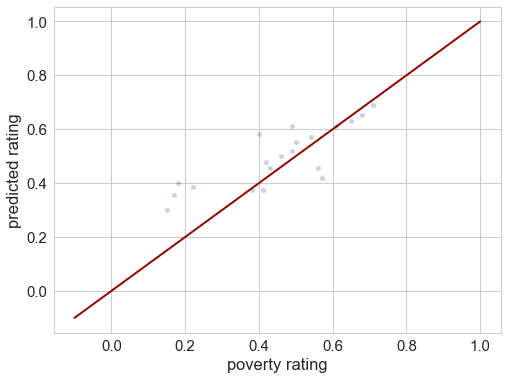

In [31]:

model= linear_model.LinearRegression()
showRegressionZoomedOut(model, "Linear Regression", features_train,target_train, features_test, target_test)

Ridge Regression, alpha=0.5
MSE:  0.113179416161


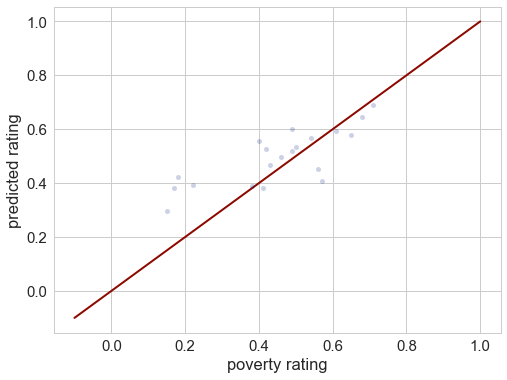

In [32]:
model= linear_model.Ridge(alpha=0.5)
showRegressionZoomedOut(model, "Ridge Regression, alpha=0.5", features_train,target_train, features_test, target_test)

Ridge Regression, alpha=0.0.001
MSE:  0.109120533613


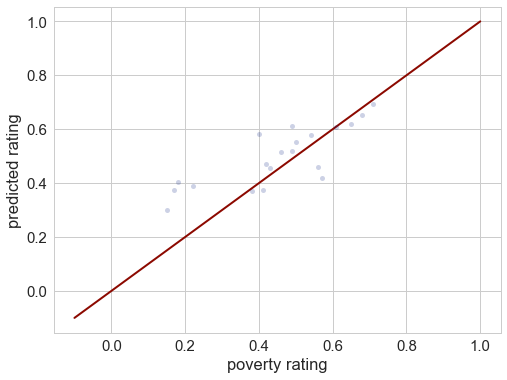

In [33]:
model= linear_model.Ridge(alpha=0.001) 
showRegressionZoomedOut(model, "Ridge Regression, alpha=0.0.001", features_train,target_train, features_test, target_test)

Lasso, alpha=1.0
MSE:  0.150503484676


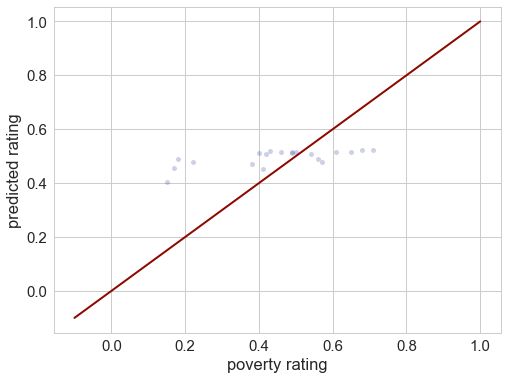

In [34]:
model= linear_model.Lasso() 
showRegressionZoomedOut(model, "Lasso, alpha=1.0", features_train,target_train, features_test, target_test)

Lasso, alpha=0.7
MSE:  0.142915125909


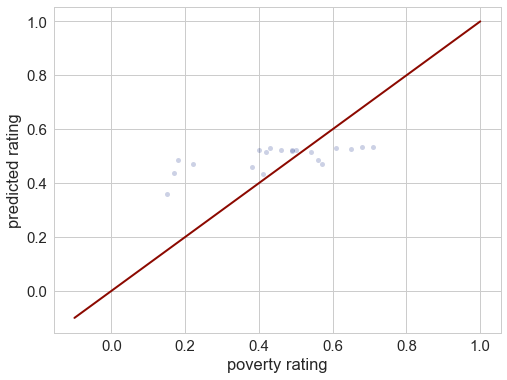

In [35]:
model= linear_model.Lasso(alpha=0.7) 
showRegressionZoomedOut(model, "Lasso, alpha=0.7", features_train,target_train, features_test, target_test)

SGDRegressor alpha=0.001
MSE:  3.52038884127e+12


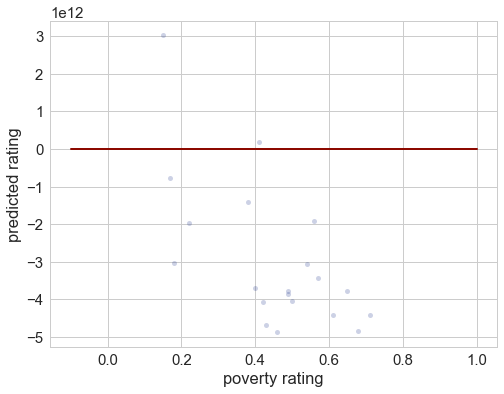

In [36]:
model= linear_model.SGDRegressor(alpha=0.001) 
showRegressionZoomedOut(model, "SGDRegressor alpha=0.001", features_train,target_train, features_test, target_test)

DecisionTreeRegressor
MSE:  0.137186005117


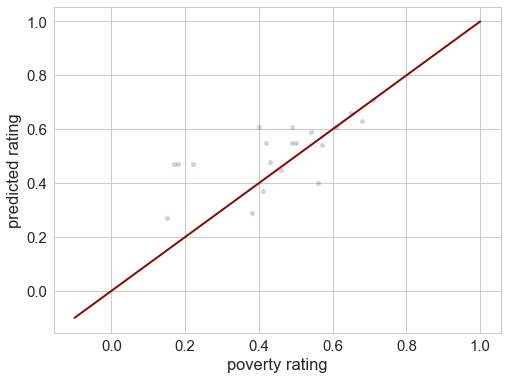

In [37]:
import sklearn
model = sklearn.tree.DecisionTreeRegressor()
showRegressionZoomedOut(model, "DecisionTreeRegressor", features_train,target_train, features_test, target_test)

DecisionTreeRegressor, max_depth=9
MSE:  0.10068101443


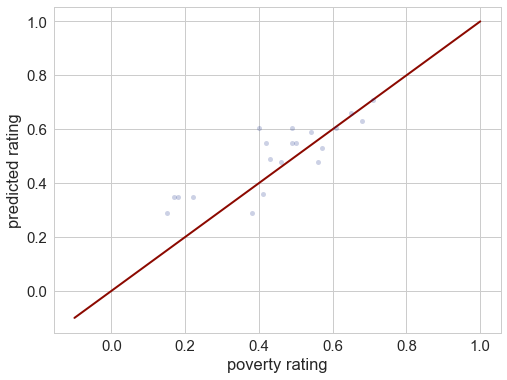

In [38]:
model = sklearn.tree.DecisionTreeRegressor(max_depth=9)
showRegressionZoomedOut(model, "DecisionTreeRegressor, max_depth=9", features_train,target_train, features_test, target_test)

KNeighborsRegressor, K=3
MSE:  0.109465874946


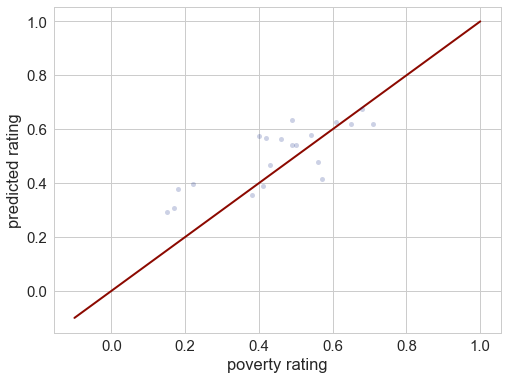

In [39]:
model= sklearn.neighbors.KNeighborsRegressor(n_neighbors = 3)
showRegressionZoomedOut(model, "KNeighborsRegressor, K=3", features_train,target_train, features_test, target_test)

KNeighborsRegressor, K=8
MSE:  0.1207587933


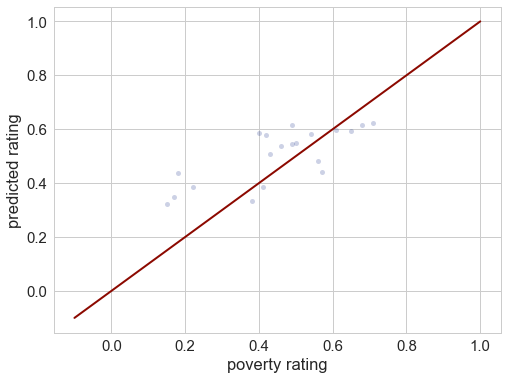

In [40]:
model= sklearn.neighbors.KNeighborsRegressor(n_neighbors = 8, weights='distance')
showRegressionZoomedOut(model, "KNeighborsRegressor, K=8", features_train,target_train, features_test, target_test)

KNeighborsRegressor, K=30
MSE:  0.160866818621


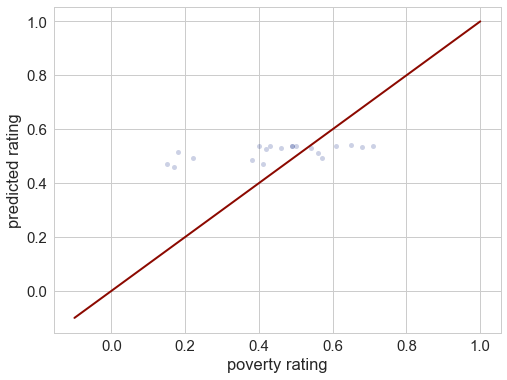

In [41]:
model= sklearn.neighbors.KNeighborsRegressor(n_neighbors = 30)
showRegressionZoomedOut(model, "KNeighborsRegressor, K=30", features_train,target_train, features_test, target_test)

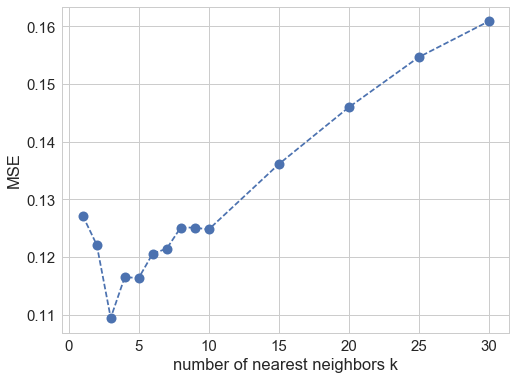

In [42]:
makeKNNChart(features_train, target_train, features_test, target_test)

# K_values = [1,2,3,4,5,6,7,8,9,10,15,20,25,30]
# mse_values = []
# for k in K_values:
#     model= sklearn.neighbors.KNeighborsRegressor(n_neighbors = k)
#     model.fit(features_train,target_train)
#     predictions= model.predict(features_test)
#     mse_values.append(np.sqrt(mean_squared_error(target_test,predictions)))
# from sklearn import metrics
# plt.figure(figsize=(8,6))
# plt.plot(K_values,mse_values,"o--",markersize=10)

# plt.grid(which="minor")
# plt.xlabel("number of nearest neighbors k")
# plt.ylabel("MSE")

In [43]:
for key in mseScores:
    print(mseScores[key], " ", key)
    
print("\nLowest MSE:")
min(mseScores.items(), key=lambda k: k[1])

0.107112075269   Linear Regression
0.113179416161   Ridge Regression, alpha=0.5
0.109120533613   Ridge Regression, alpha=0.0.001
0.150503484676   Lasso, alpha=1.0
0.142915125909   Lasso, alpha=0.7
3.52038884127e+12   SGDRegressor alpha=0.001
0.137186005117   DecisionTreeRegressor
0.10068101443   DecisionTreeRegressor, max_depth=9
0.109465874946   KNeighborsRegressor, K=3
0.1207587933   KNeighborsRegressor, K=8
0.160866818621   KNeighborsRegressor, K=30

Lowest MSE:


('DecisionTreeRegressor, max_depth=9', 0.10068101443006358)

Decision Tree Regression wins! Let's try the leave-one-out technique: 

In [44]:
mSEs = {}

def leaveOneOutDecisionTreeRegression(feature_columns, features, labels):
    for i in feature_columns:
        features_copy = features
        
        
        features_copy = features_copy.drop(i, 1)
        print (features_copy.columns)
        print("left out: ", i)
        features_temp = features_copy.as_matrix()
        features_train, features_test, labels_train, labels_test = train_test_split(features_temp, labels, test_size=0.33, random_state=42)
        
        sklearn.tree.DecisionTreeRegressor()
        model.fit(features_train,labels_train)
        predictions= model.predict(features_test)
        print("MSE: ", np.sqrt(mean_squared_error(target_test,predictions)))
        mSEs[i]=np.sqrt(mean_squared_error(target_test,predictions))

leaveOneOutLinearRegression(feature_columns, features_pandas, target_pandas)

Index(['Education Deprivation', 'Health Deprivation', 'Living Standards',
       'Percent in Multidimentional Poverty',
       'Percent Below National Poverty Line', 'Percent Below $1.25 per Day'],
      dtype='object')
left out:  Intensity of Deprivation
MSE:  0.108340147633
Index(['Intensity of Deprivation', 'Health Deprivation', 'Living Standards',
       'Percent in Multidimentional Poverty',
       'Percent Below National Poverty Line', 'Percent Below $1.25 per Day'],
      dtype='object')
left out:  Education Deprivation
MSE:  0.107986920843
Index(['Intensity of Deprivation', 'Education Deprivation', 'Living Standards',
       'Percent in Multidimentional Poverty',
       'Percent Below National Poverty Line', 'Percent Below $1.25 per Day'],
      dtype='object')
left out:  Health Deprivation
MSE:  0.108015204021
Index(['Intensity of Deprivation', 'Education Deprivation',
       'Health Deprivation', 'Percent in Multidimentional Poverty',
       'Percent Below National Poverty Li

In [45]:
mSEs

{'Education Deprivation': 0.10798692084311164,
 'Health Deprivation': 0.10801520402100143,
 'Intensity of Deprivation': 0.10834014763293012,
 'Living Standards': 0.10800454519056693,
 'Percent Below $1.25 per Day': 0.109400435744823,
 'Percent Below National Poverty Line': 0.10814836522456772,
 'Percent in Multidimentional Poverty': 0.10835108061322324}

In [46]:
print(min(mSEs.items(), key=lambda k: k[1]), "matters the least, \nand ", max(mSEs.items(), key=lambda k: k[1]), "matters the most.")

('Education Deprivation', 0.10798692084311164) matters the least, 
and  ('Percent Below $1.25 per Day', 0.109400435744823) matters the most.
